In [1]:
# extend python path
import sys
from pathlib import Path
sys.path.append(str(Path('..').absolute()))

from fingerprint2vec.converter import Embedding
from fingerprint2vec.corpus import Node2Vec, Node2VecHelper, pathes2fp
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from ipywidgets import interact,fixed,IntSlider
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import seaborn as sns

RDKit WARNING: [00:25:34] Enabling RDKit 2019.09.1 jupyter extensions


# Load a pre-trained model
We write a simple class `Embedding` for loading models, converting molecules to substructure tokens and embeddings.

In [2]:
# randomly choose a model
model = Embedding('../models/embedding-r1-p0.5-q0.5.model')

30871 sub-structures with dimension 300


# Construct a group of molecules and test them

In [3]:
smilst = ['Fc1ccccc1', 'Clc1ccccc1', 'Brc1ccccc1',
          'Clc1c(Cl)cccc1', 'Clc1cc(Cl)ccc1', 'Clc1ccc(Cl)cc1', 
          'FC1=CC=CCC1', 'ClC1=CC=CCC1', 'BrC1=CC=CCC1',
          'O=Cc1ccccc1', 'CC(=O)c1ccccc1', 'ClC(=O)c1ccccc1',
          'O=CC1CCCCC1', 'CC(=O)C1CCCCC1', 'ClC(=O)C1CCCCC1',
         'ClC1=CC=CC=CC=C1', 'O=CC1=CC=CC=CC=C1', 'CC(=O)C1=CC=CC=CC=C1']
mols = [Chem.MolFromSmiles(s) for s in smilst]

# Visualize a piece of sub-structure by Morgan algorithm
A sub-structure is defined as a central atom and surrounding atoms with-in radius $r$, using Morgan algorithm. From pre-training, we have embedding vectors for all sub-structure that $r=0, 1$.

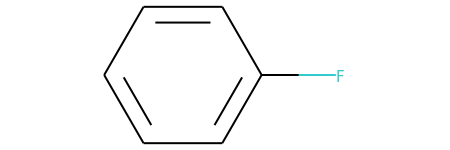

In [4]:
mols[0]

In [5]:
# raw sub-structure tokens
print(model.substructure(mols[0]))

['882399112', '3337745083', '3217380708', '1637836422', '3218693969', '951226070', '3218693969', '98513984', '3218693969', '98513984', '3218693969', '98513984', '3218693969', '951226070']


In [6]:
def renderFpBit(mol,bitIdx,bitInfo,fn):
    bid = bitIdx
    return(display(fn(mol,bid,bitInfo)))

bi = dict()
AllChem.GetMorganFingerprint(mols[0], radius=1, bitInfo=bi)

interact(renderFpBit, bitIdx=list(bi.keys()),mol=fixed(mols[0]),
         bitInfo=fixed(bi),fn=fixed(Draw.DrawMorganBit));

interactive(children=(Dropdown(description='bitIdx', options=(98513984, 882399112, 951226070, 1637836422, 3217…

# Similarity heat map
The embedding could tell if the functional groups are conjugated with double bonds; if it has aromatic systems; the similarity between functional groups, etc. 

(18, 300)


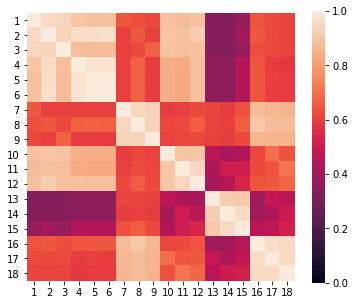

In [7]:
# molecule level embeddings
vecs = model.embed_batch(smilst)
dm = 1 - squareform(pdist(vecs, 'cosine'))
print(vecs.shape)
plt.figure(1, figsize=(6, 5))
sns.heatmap(dm, vmin=0, vmax=1, square=True, 
            xticklabels=[str(i+1) for i in range(18)], yticklabels=[str(i+1) for i in range(18)])
_ = plt.xticks(rotation='horizontal')
_ = plt.yticks(rotation='horizontal')

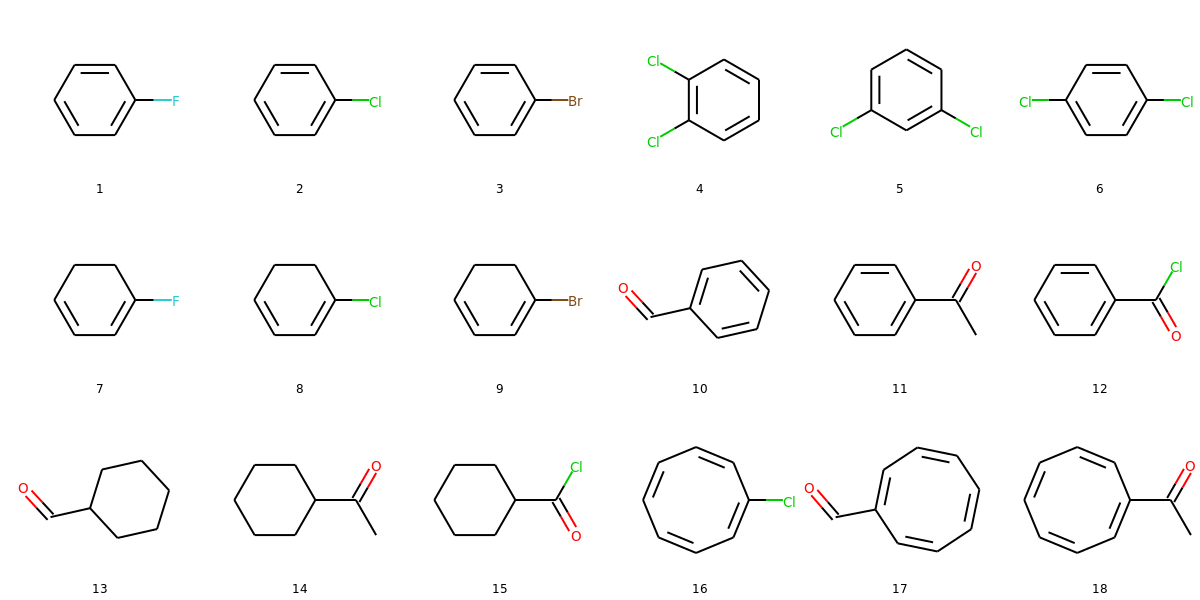

In [8]:
Draw.MolsToGridImage(mols, legends=[str(i) for i in range(1, 19)], molsPerRow=6, subImgSize=(200,200))   